## Observations and Insights 

In [279]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [280]:
# Checking the number of mice.
total_mouse = len(combined_df["Mouse ID"].unique())
total_mouse

249

In [296]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [315]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = combined_df.loc[combined_df['Mouse ID'] == "g989",:]
dup_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [299]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

data_clean_df = combined_df[combined_df["Mouse ID"].isin(dup_mouse)==False]
data_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [318]:
# Checking the number of mice in the clean DataFrame.
total_mouse_clean = len(data_clean_df["Mouse ID"].unique())
total_mouse_clean

248

## Summary Statistics

In [328]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

stat_data_clean_df = data_clean_df.groupby (["Drug Regimen"])
stat_data_clean_df.count().head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 


drug_regime_mean = round(stat_data_clean_df["Tumor Volume (mm3)"].mean(),2)
drug_regime_median= round(stat_data_clean_df["Tumor Volume (mm3)"].median(),2)
drug_regime_variance = round(stat_data_clean_df["Tumor Volume (mm3)"].var(),2)
drug_regime_stdr_dev = round(stat_data_clean_df["Tumor Volume (mm3)"].std(),2)
regimen_sem = round(data_clean_df["Tumor Volume (mm3)"].sem(),2)

# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"Mean":drug_regime_mean,
                           "Median":drug_regime_median, 
                           "Variance": drug_regime_variance, 
                           "Standard Deviation": drug_regime_stdr_dev,
                           "SEM": regimen_sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.21
Ceftamin,52.59,51.78,39.29,6.27,0.21
Infubinol,52.88,51.82,43.13,6.57,0.21
Ketapril,55.24,53.70,68.55,8.28,0.21
Naftisol,54.33,52.51,66.17,8.13,0.21
Placebo,54.03,52.29,61.17,7.82,0.21
Propriva,52.32,50.45,43.85,6.62,0.21
Ramicane,40.22,40.67,23.49,4.85,0.21
Stelasyn,54.23,52.43,59.45,7.71,0.21


In [329]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_II = round(data_clean_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"],2)
summary_II.head(12)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

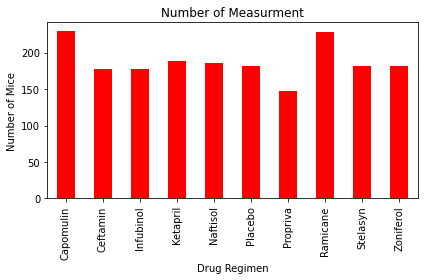

In [303]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

total_measurments = data_clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_pandas = total_measurments.plot.bar(color='r')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Measurment")

plt.savefig("../Images/Number of Measurments.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

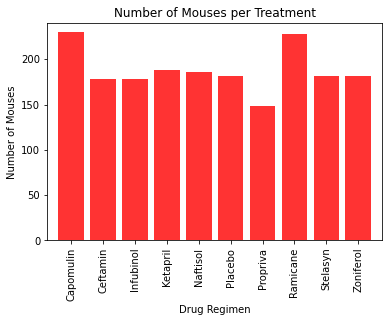

In [304]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

count_mouse = data_clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

count_mouse

mouse_list =data_clean_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
mouse_list

x_axis = np.arange(len(count_mouse))
fig1, ax1 = plt.subplots()
plt.bar(x_axis, mouse_list, color='r', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mouse_list)+10)

plt.title("Number of Mouses per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouses")

plt.savefig("../Images/Number of Mouses per Treatment.png", bbox_inches = "tight")

In [305]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = data_clean_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


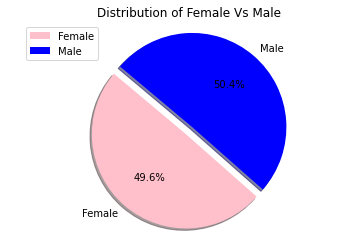

In [306]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["pink", "blue"]
explode = (0.1, 0)
mouse_gender.plot.pie(y='Total Count', colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title("Distribution of Female Vs Male")
plt.ylabel(" ")
plt.axis("equal")

plt.savefig("../Images/Distribution of Female Vs Male.png", bbox_inches = "tight")
plt.show()

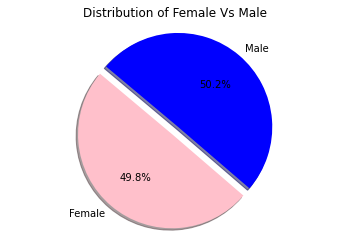

In [307]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['pink', 'blue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title("Distribution of Female Vs Male")

plt.axis("equal")

plt.savefig("../Images/Distribution of Female Vs Male Pyplot", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [336]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Capomulin"]
ramicane_df = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Ramicane"]
infubinol_df = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Infubinol"]
ceftamin_df = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

capomulin_max_timepoint = capomulin_df.groupby('Mouse ID').max()['Timepoint']
ramicane_max_timepoint = ramicane_df.groupby('Mouse ID').max()['Timepoint']
infubinol_max_timepoint = infubinol_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_max_timepoint = ceftamin_df.groupby('Mouse ID').max()['Timepoint']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_volume = pd.DataFrame(capomulin_max_timepoint)
capomulin_combined = pd.merge(capomulin_volume, data_clean_df, on=("Mouse ID","Timepoint"))
capomulin_combined.head()

ramicane_volume = pd.DataFrame(ramicane_max_timepoint)
ramicane_combined = pd.merge(ramicane_volume, data_clean_df, on=("Mouse ID","Timepoint"))
ramicane_combined.head()

infubinol_volume = pd.DataFrame(infubinol_max_timepoint)
infubinol_combined = pd.merge(infubinol_volume, data_clean_df, on=("Mouse ID","Timepoint"))
infubinol_combined.head()

ceftamin_volume = pd.DataFrame(ceftamin_max_timepoint)
ceftamin_combined = pd.merge(ceftamin_volume, data_clean_df, on=("Mouse ID","Timepoint"))
ceftamin_combined.head()

merged_df = capomulin_combined + ramicane_combined + infubinol_combined + ceftamin_combined
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128a411a203a275,180,CapomulinRamicaneInfubinolCeftamin,FemaleMaleFemaleFemale,52,95,208.363271,8
1,b742a444a251b447,135,CapomulinRamicaneInfubinolCeftamin,MaleFemaleFemaleMale,40,101,192.512918,1
2,f966a520a577b487,120,CapomulinRamicaneInfubinolCeftamin,MaleMaleFemaleFemale,41,91,182.385962,4
3,g288a644a685b759,165,CapomulinRamicaneInfubinolCeftamin,MaleFemaleMaleFemale,30,91,191.878441,6
4,g316c458c139f436,135,CapomulinRamicaneInfubinolCeftamin,FemaleFemaleMaleFemale,59,95,199.450037,8


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
    
for treatment in treatments:
    tx_regimen = tx_df.loc[tx_df["Drug Regimen"] == treatment]
    tumor_vol= tx_regimen['Tumor Volume (mm3)']    

    tumor_vol_data.append(tumor_vol)

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [309]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_plot = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
line_plot.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


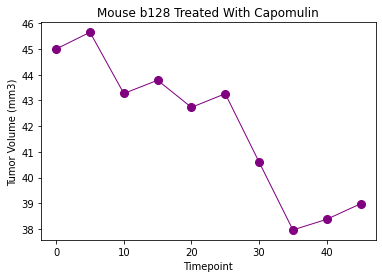

In [310]:
x_axis = line_plot["Timepoint"]
y_axis = line_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Mouse b128 Treated With Capomulin")
plt.plot(x_axis, y_axis, linewidth=1, markersize=8,marker="o",color="purple")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


plt.savefig("../Images/Mouse b128 Treated With Capomulin", bbox_inches = "tight")
plt.show()

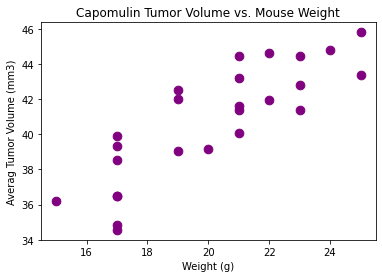

In [311]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_average_volume =capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(capomulin_average_volume['Weight (g)'],capumulin_average_volume["Tumor Volume (mm3)"],s=75, color="purple")
plt.title("Capomulin Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")


plt.savefig("../Images/Capomulin Tumor Volume vs. Mouse Weight.png", bbox_inches = "tight")
plt.show()

## Correlation and Regression

In [312]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation=round(st.pearsonr(capomulin_average_volume["Weight (g)"],capomulin_average_volume["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")


The correlation between mouse weight and average tumor volume is 0.84


The r-squared is: 0.7088568047708717


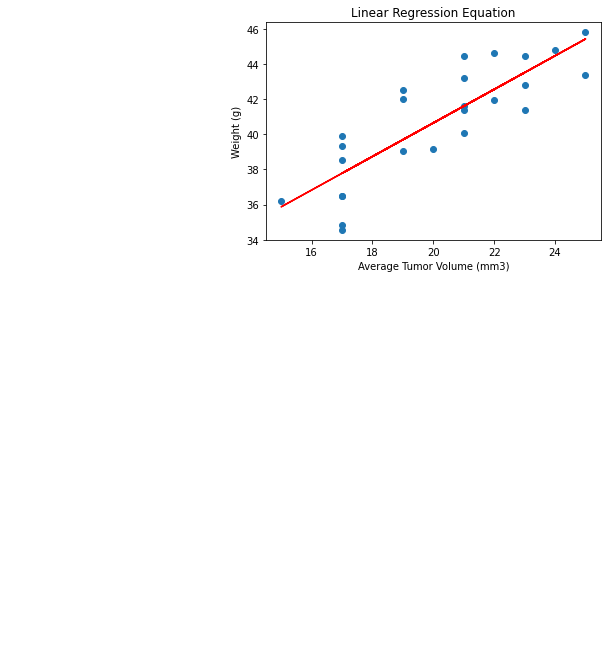

In [313]:
x_values = capomulin_average_volume["Weight (g)"]
y_values = capomulin_average_volume["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Linear Regression Equation")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear Regression.png", bbox_inches = "tight")
plt.show()